# 1) Scipy:
## We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.
### Task:
1. fitting it to the periodic function
2. plot the fit
Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
max_temp=np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp=np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [3]:
months=np.arange(12)

In [4]:
from scipy import optimize
def temp_per_year(times, avg, ampl, time_offset):
    return(avg+ ampl* np.cos((times + time_offset) *2*np.pi/ times.max()))
result_max, cov_max=optimize.curve_fit(temp_per_year, months, max_temp,[20,10,0])
result_min, cov_min=optimize.curve_fit(temp_per_year, months, min_temp,[-40,20,0])

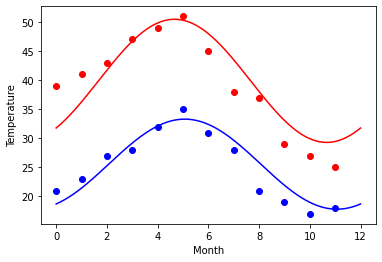

In [5]:
days=np.linspace(0,12,num=365)
plt.figure()
plt.plot(months,max_temp,'ro')
plt.plot(days, temp_per_year(days, *result_max), 'r-')
plt.plot(months, min_temp, 'bo')
plt.plot(days, temp_per_year(days, *result_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

# 2) Matplotlib:
## This assignment is for visualization using matplotlib:
### data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
### Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [6]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

In [7]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


1. Create a pie chart presenting the male/female proportion

In [8]:
data=titanic['sex'].value_counts()
data

male      843
female    466
Name: sex, dtype: int64

In [9]:
label='male', 'female'
colors=['b','r']

([<matplotlib.patches.Wedge at 0x22716b4a9d0>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'male'),
  Text(0.48083667958064136, -0.9893412391939719, 'female')],
 [Text(-0.262274603023337, 0.5396406513680664, '64%'),
  Text(0.26227455249853165, -0.5396406759239846, '36%')])

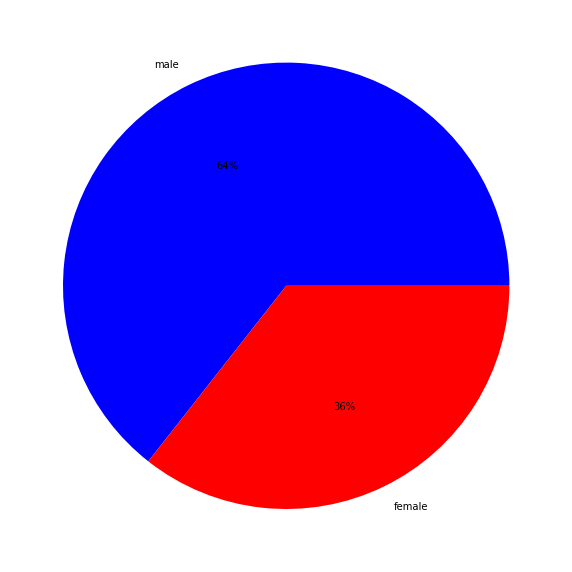

In [12]:
fig=plt.figure(figsize=(10,15))
plt.pie(data,labels=label, colors=colors,autopct='%1.0f%%')

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

Text(0, 0.5, 'Age')

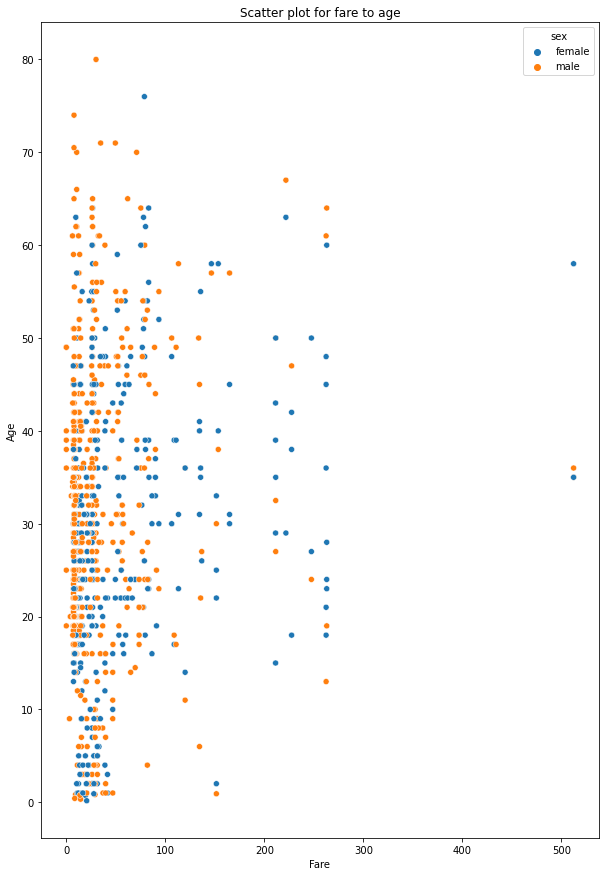

In [13]:
fig=plt.figure(figsize=(10,15))
sns.scatterplot(x='fare',y='age',data=titanic, hue='sex')
plt.title('Scatter plot for fare to age')
plt.xlabel('Fare')
plt.ylabel('Age')